In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df=pd.read_csv('/content/blinkit_data (1).csv')

In [17]:
df.tail(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8513,Regular,DRY23,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.108568,NaN,42.9112,4.0
8514,low fat,FDA11,Baking Goods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.043029,NaN,94.7436,4.0
8515,low fat,FDK38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.053032,NaN,149.1734,4.0
8516,low fat,FDO38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.072486,NaN,78.9986,4.0
8517,low fat,FDG32,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.175143,NaN,222.3772,4.0
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [18]:
df.shape

(8523, 12)

In [19]:
print("Size of Data ",df.shape)

Size of Data  (8523, 12)


# **Field** **info**

In [20]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [21]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [23]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [24]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [25]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


**BUSINESS REQUIREMENTS**

**KPI's REQUIREMENTS**

In [29]:
total_sales=df['Sales'].sum()
#Average sales
avg_sales=df['Sales'].mean()
# No of  Items Sold
no_of_items_sold=df['Sales'].count()
# Average Rating
average_rating=df['Rating'].mean()

#Display
print(f"Total Sales: ${total_sales :,.0f}")
print(f"Average Sales: ${avg_sales :,.1f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Rating: {average_rating :,.1f}")





Total Sales: $1,201,681
Average Sales: $141.0
No of Items Sold: 8,523
Average Rating: 4.0


**CHARTS REQUIRMENTS**

**Total Sales by Fat content**

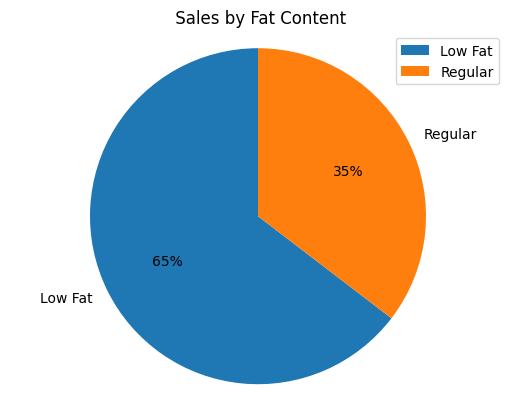

In [32]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,  autopct = '%.0f%%',
       startangle= 90 )
plt.title(' Sales by Fat Content')
plt.axis( 'equal')
plt.legend()
plt.show()



Total Sales by Item

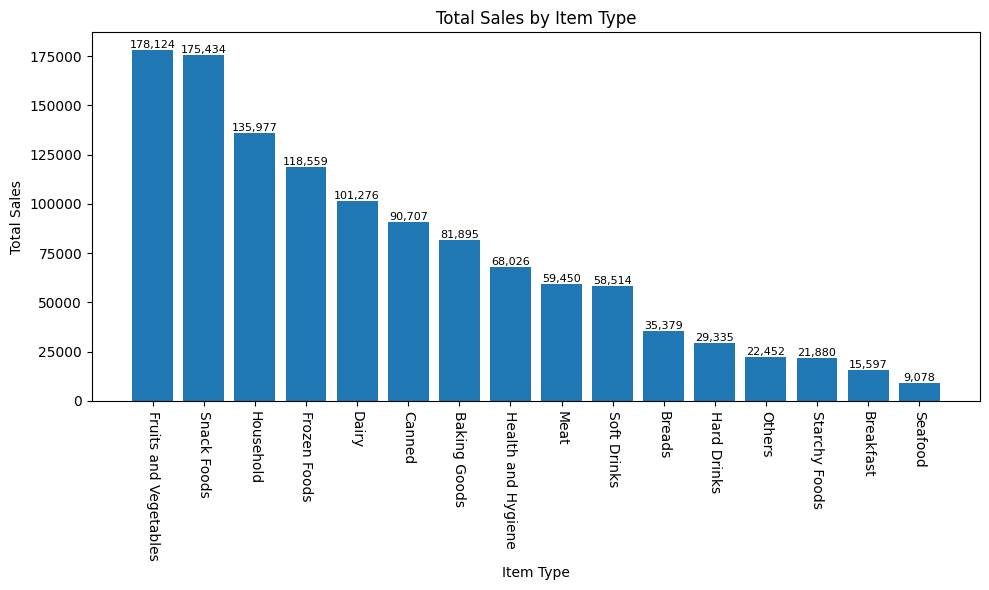

In [36]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))

bars=plt.bar(sales_by_type.index,sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom',fontsize=8)

plt.tight_layout()
plt.show()


Fat Content by Outlet for Total Sales

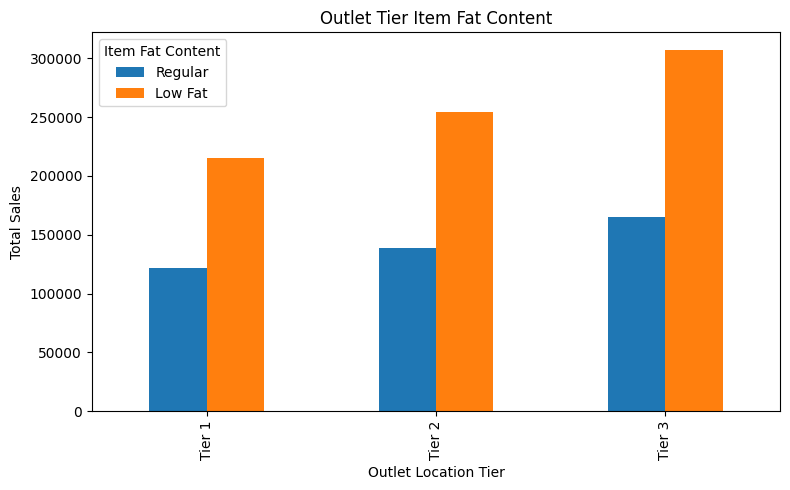

In [42]:
df.columns = df.columns.str.strip()

grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

grouped.plot(kind='bar', figsize=(8,5), title='Outlet Tier Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


**Total Sales by Outlet Establishment**

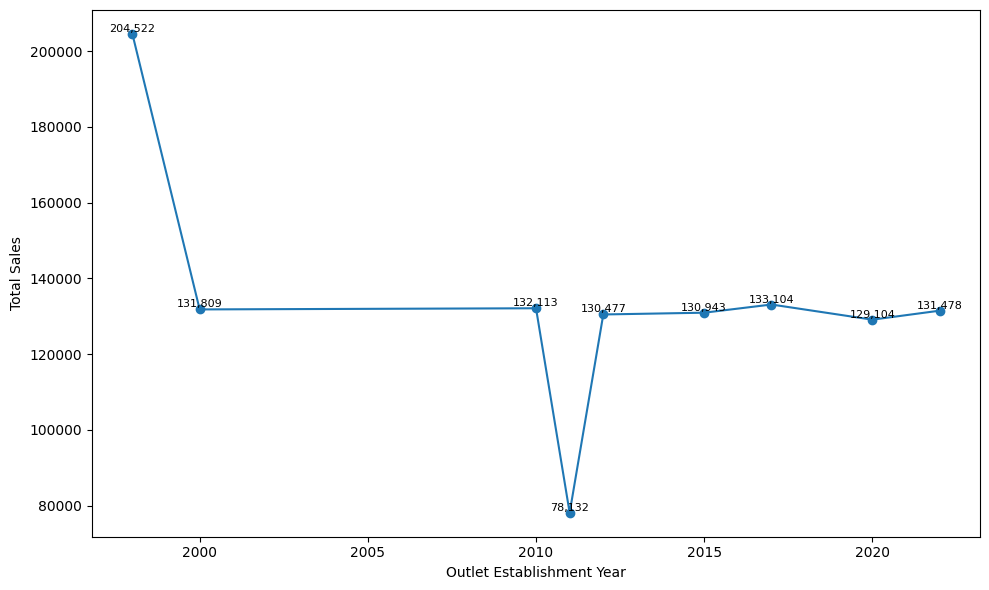

In [43]:
sales_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
for x,y in zip(sales_by_year.index, sales_by_year.values):
  plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom',fontsize=8)


plt.tight_layout()
plt.show()

**Sales by Outlet Size**

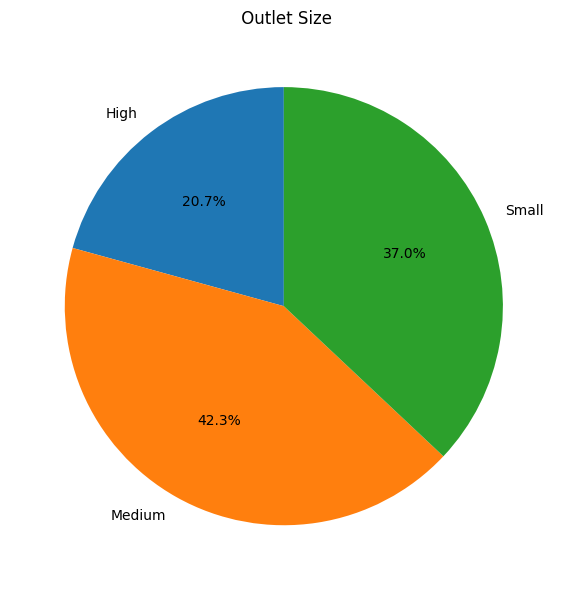

In [45]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(10, 6))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title(' Outlet Size')
plt.tight_layout()
plt.show()

**Sales by Outlet Location**

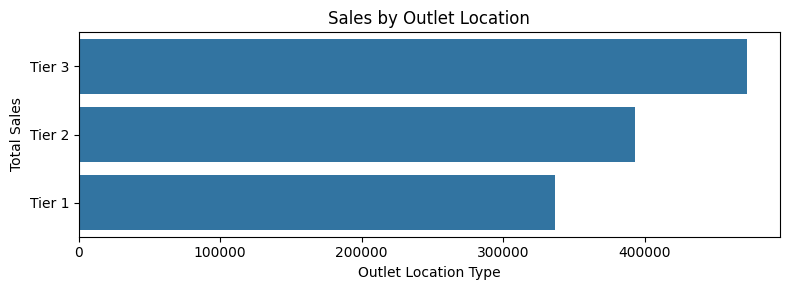

In [48]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Sales by Outlet Location')
plt.tight_layout()
plt.show()